In [4]:
%pip install numpy
%pip install pandas
%pip install pandas
%pip install matplotlib 
%pip install geopandas
%pip install scikit-learn
%pip install nltk matplotlib
%pip install WordCloud
%pip install Counter
%pip install nltk

import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import ast
import geopandas as gpd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')
from collections import Counter
from wordcloud import WordCloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Isadora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Isadora\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Isadora\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Isadora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#Import and view datasets to understand the content
hotels = pd.read_csv('./archive/offerings.csv')
reviews = pd.read_csv('./archive/reviews.csv')

hotels.info()
reviews.info()

NameError: name 'pd' is not defined

In [159]:
# check for duplicates
hotels.duplicated().sum()

0

In [160]:
# merge 2 datasets
hotels = hotels.rename(columns={'id':'offering_id'})

df = pd.merge(reviews, hotels,
                   on='offering_id',
                   how='inner')
df.head()

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,hotel_class,region_id,url,phone,details,address,type,name
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",December 2012,93338,0,2012-12-17,147643103,False,3.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '2130 Broad...",hotel,Hotel Beacon
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",December 2012,93338,0,2012-12-17,147639004,False,3.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '2130 Broad...",hotel,Hotel Beacon
2,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Excellent location”,Loved the hotel. Great location - only 2 block...,"{'username': 'Erica1103', 'num_cities': 2, 'nu...",December 2012,93338,0,2012-12-17,147634248,False,3.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '2130 Broad...",hotel,Hotel Beacon
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“All-round fantastic NYC hotel”,Our first stay on the upper west side and can'...,"{'username': 'rmfindc', 'num_reviews': 8, 'num...",December 2012,93338,0,2012-12-17,147625002,False,3.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '2130 Broad...",hotel,Hotel Beacon
4,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Great hotel in nice area”,"Great room, very big with huge bed! Great loca...","{'username': 'MiloandMaya', 'num_cities': 2, '...",December 2012,93338,0,2012-12-17,147623184,False,3.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '2130 Broad...",hotel,Hotel Beacon


In [52]:
author_first_row = df['ratings'].iloc[0-10]
print(author_first_row)

{'service': 5.0, 'cleanliness': 5.0, 'overall': 5.0, 'value': 5.0, 'rooms': 5.0, 'location': 5.0}


In [53]:
author_first_row = df['author'].iloc[0]
print(author_first_row)

{'username': 'Papa_Panda', 'num_cities': 22, 'num_helpful_votes': 12, 'num_reviews': 29, 'num_type_reviews': 24, 'id': '8C0B42FF3C0FA366A21CFD785302A032', 'location': 'Gold Coast'}


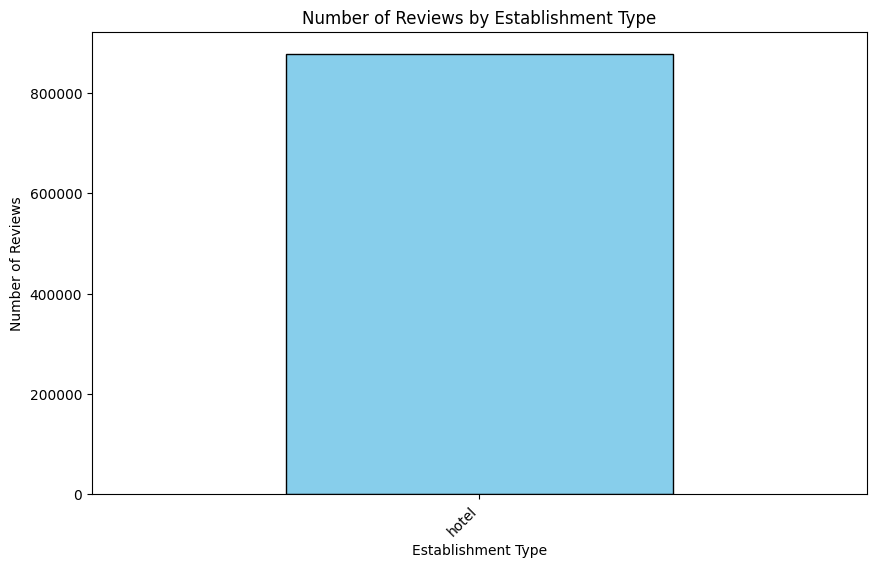

In [161]:


# Assuming 'df' is your DataFrame and 'type' is the column with establishment types
type_counts = df['type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Number of Reviews by Establishment Type')
plt.xlabel('Establishment Type')
plt.ylabel('Number of Reviews')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

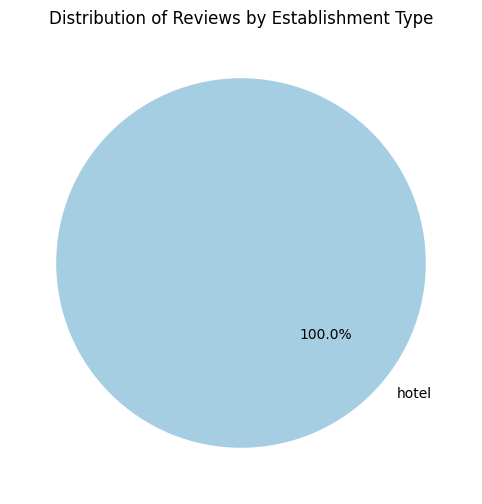

In [162]:

# Assuming 'df' is your DataFrame and 'type' is the column with establishment types
type_counts = df['type'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Reviews by Establishment Type')

# Show the plot
plt.show()

In [163]:
# print((df["num_helpful_votes"] == 0).sum())


# URL are not good

columns_to_remove = ['type','offering_id','id','num_helpful_votes','date_stayed', 'via_mobile', 'region_id','url','phone','details']

# Remove the specified columns
df = df.drop(columns=columns_to_remove)
df.head()


,ratings,title,text,author,date,hotel_class,address,name
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon
2,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Excellent location”,Loved the hotel. Great location - only 2 block...,"{'username': 'Erica1103', 'num_cities': 2, 'nu...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“All-round fantastic NYC hotel”,Our first stay on the upper west side and can'...,"{'username': 'rmfindc', 'num_reviews': 8, 'num...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon
4,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Great hotel in nice area”,"Great room, very big with huge bed! Great loca...","{'username': 'MiloandMaya', 'num_cities': 2, '...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon


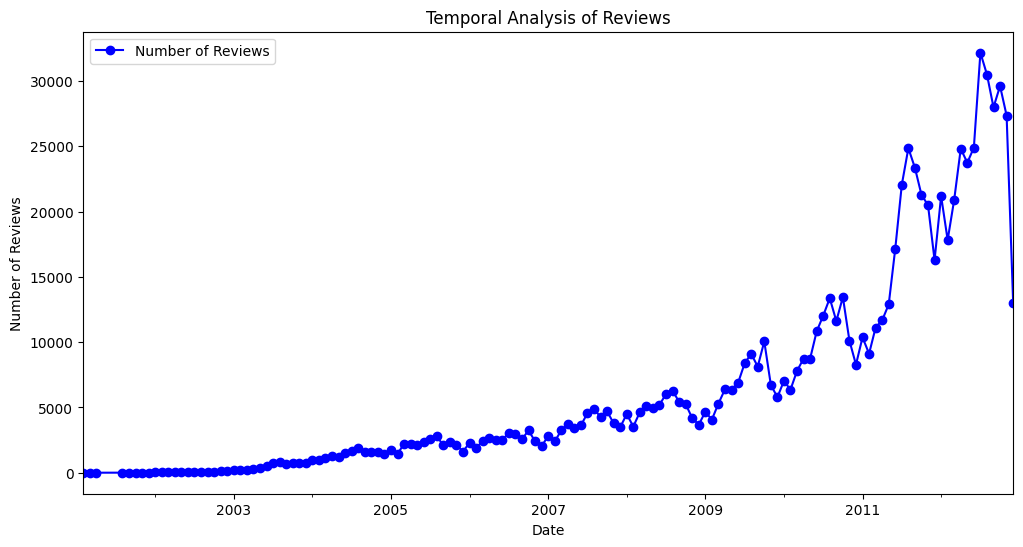

In [149]:


# Assuming 'df' is your DataFrame and 'date' is the column with review dates
df['date'] = pd.to_datetime(df['date'])  # Convert the 'date' column to datetime format

# Group by date and count the number of reviews for each date
reviews_by_date = df.groupby(df['date'].dt.to_period("M")).size()

# Create a line plot
plt.figure(figsize=(12, 6))
reviews_by_date.plot(marker='o', linestyle='-', color='blue', label='Number of Reviews')

# Add labels and title
plt.title('Temporal Analysis of Reviews')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [58]:
author_first_row = df['address'].iloc[0]
print(author_first_row)

{'region': 'NY', 'street-address': '2130 Broadway at 75th Street', 'postal-code': '10023', 'locality': 'New York City'}


In [59]:


# # Assuming 'df' is your DataFrame
# # Step 1: Convert the JSON-like strings to JSON objects
# df['address'] = df['address'].apply(ast.literal_eval)

# # Step 2: Create the address_table DataFrame
# address_table = pd.json_normalize(df['address'])

# # Now 'address_table' contains individual columns for region, street-address, postal-code, and locality
# # You can concatenate 'address_table' with your original DataFrame if needed
# df = pd.concat([df, address_table], axis=1)

# address_table.head()


,region,street-address,postal-code,locality
0,NY,2130 Broadway at 75th Street,10023,New York City
1,NY,2130 Broadway at 75th Street,10023,New York City
2,NY,2130 Broadway at 75th Street,10023,New York City
3,NY,2130 Broadway at 75th Street,10023,New York City
4,NY,2130 Broadway at 75th Street,10023,New York City


In [60]:
url = 'https://raw.githubusercontent.com/MinnPost/simple-map-d3/master/example-data/world-population.geo.json'

# Load a GeoDataFrame with region geometries (you need a GeoJSON file for this)
# You can replace 'path/to/regions.geojson' with the actual path to a GeoJSON file
regions_geo = gpd.read_file(url)
print(regions_geo['ISO_2_CODE'])

0      AF
1      AL
2      DZ
3      AD
4      AO
       ..
206    YE
207    RS
208    CD
209    ZM
210    ZW
Name: ISO_2_CODE, Length: 211, dtype: object


In [61]:
rows_ca = address_table[address_table['region'] == 'CA']
print(rows_ca)

       region          street-address postal-code       locality
267570     CA         300 S Doheny Dr       90048    Los Angeles
267571     CA         300 S Doheny Dr       90048    Los Angeles
267572     CA         300 S Doheny Dr       90048    Los Angeles
267573     CA         300 S Doheny Dr       90048    Los Angeles
267574     CA         300 S Doheny Dr       90048    Los Angeles
...       ...                     ...         ...            ...
667293     CA  900 North Point Street       94109  San Francisco
667294     CA  900 North Point Street       94109  San Francisco
667295     CA  900 North Point Street       94109  San Francisco
667296     CA  900 North Point Street       94109  San Francisco
667297     CA  900 North Point Street       94109  San Francisco

[210264 rows x 4 columns]


In [62]:
url= gpd.datasets.get_path("naturalearth_lowres")
print(url)

c:\Users\Isadora\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\datasets\naturalearth_lowres\naturalearth_lowres.shp


C:\Users\Isadora\AppData\Local\Temp\ipykernel_38716\534767212.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  url= gpd.datasets.get_path("naturalearth_lowres")


In [63]:
##!!!! Nao esta a dar bem - encontrar geopanda com estados da america

# Assuming 'df' is your DataFrame and 'region' is the column with region information
# You might need to install geopandas: pip install geopandas

# Create a GeoDataFrame with the regions and their counts
reviews_by_region = address_table['region'].value_counts().reset_index()

reviews_by_region.columns = ['region', 'review_count']
print(reviews_by_region)

# url = 'https://raw.githubusercontent.com/MinnPost/simple-map-d3/master/example-data/world-population.geo.json'
url= gpd.datasets.get_path("naturalearth_lowres")
# Load a GeoDataFrame with region geometries (you need a GeoJSON file for this)
# You can replace 'path/to/regions.geojson' with the actual path to a GeoJSON file
regions_geo = gpd.read_file(url)
print(regions_geo)


# Merge the reviews count with the region geometries
merged = regions_geo.merge(reviews_by_region, left_on='ISO_2_CODE', right_on='region', how='left')

# # Plot the choropleth map
# fig, ax = plt.subplots(1, 1, figsize=(12, 10))
# # merged.plot(column='review_count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# merged.plot(column='review_count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, cax=None)


# Filter out rows with NaN values in the 'review_count' column
merged = merged[~merged['review_count'].isna()]

# Plot the choropleth map without NaN values and without color scale
fig, ax = plt.subplots(1, 1, figsize=(12, 10))  # Adjust the figsize to increase the map size
merged.plot(column='review_count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, cax=None)

# Annotate countries with their names
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['region']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')

plt.title('Geographical Distribution of Reviews by Region')
plt.show()

   region  review_count
0      NY        267057
1      CA        210264
2      TX         88559
3      IL         64531
4      DC         48337
5      MA         41890
6      WA         35511
7      PA         22827
8      CO         18136
9      AZ         16282
10     MD         12707
11     IN         10970
12     TN         10867
13     NC         10566
14     OH          8106
15     FL          7951
16     MI          4000
         pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6

C:\Users\Isadora\AppData\Local\Temp\ipykernel_38716\3403630284.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  url= gpd.datasets.get_path("naturalearth_lowres")


KeyError: 'ISO_2_CODE'

In [ ]:
# author_first_row = df['ratings'].iloc[0]
# print(author_first_row)

In [164]:


json_cols = ['author']

def clean_json(x):
    "Create apply function for decoding JSON"
    try:
        # If x is not a string, convert it to a string
        if not isinstance(x, str):
            x = str(x)
        # Evaluate the literal expression using ast.literal_eval
        data = ast.literal_eval(x)
        
        # Convert the evaluated expression to a valid JSON string
        json_string = json.dumps(data)
        
        # Load the JSON string
        return json.loads(json_string)
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}\nJSON String: {x}")
        return None  # or handle the error as needed

for x in json_cols:
    df[x] = df[x].apply(clean_json)

normalized_cols = pd.json_normalize(df['author'])
df = df.join(normalized_cols)
df = df.drop(json_cols, axis=1)

In [165]:
df.head()

,ratings,title,text,date,hotel_class,address,name,username,num_cities,num_helpful_votes,num_reviews,num_type_reviews,id,location
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,Papa_Panda,22.0,12.0,29.0,24.0,8C0B42FF3C0FA366A21CFD785302A032,Gold Coast
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,Maureen V,2.0,NaN,2.0,NaN,E3C85CA9DBBBC77E0DB534ABE93E4713,"Sydney, New South Wales, Australia"
2,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Excellent location”,Loved the hotel. Great location - only 2 block...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,Erica1103,2.0,1.0,7.0,NaN,035080D10D186778123E6A58C11E0608,"Christmas Island, Australia"
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“All-round fantastic NYC hotel”,Our first stay on the upper west side and can'...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,rmfindc,2.0,NaN,8.0,NaN,412A714D6BF1607A01CC828645DD70AE,"Gaithersburg, Maryland"
4,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Great hotel in nice area”,"Great room, very big with huge bed! Great loca...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,MiloandMaya,2.0,3.0,12.0,NaN,72B051F423790BE5F0EF6A9FD23EB77E,Durham


In [ ]:
# # check for null values in columns

# # print("Column Names:")
# for column_name in df.columns:
#     print(column_name)

# print((df['num_reviews'].isnull()).sum())

Column Names:
ratings
title
text
date
hotel_class
address
type
name
username
num_cities
num_helpful_votes
num_reviews
num_type_reviews
id
location
77123


In [166]:
# Remove User private Information (i am leaving the number of reviews to later maybe add as a weight to the decision (!! warning does have empty values, evaluate if it is worth it))

columns_to_remove = ['username','num_cities','num_helpful_votes','num_type_reviews', 'id','location','num_reviews']

# Remove the specified columns
df = df.drop(columns=columns_to_remove)
df.head()

,ratings,title,text,date,hotel_class,address,name
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon
2,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Excellent location”,Loved the hotel. Great location - only 2 block...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“All-round fantastic NYC hotel”,Our first stay on the upper west side and can'...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon
4,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Great hotel in nice area”,"Great room, very big with huge bed! Great loca...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon


In [167]:
df.head()

,ratings,title,text,date,hotel_class,address,name
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon
2,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Excellent location”,Loved the hotel. Great location - only 2 block...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“All-round fantastic NYC hotel”,Our first stay on the upper west side and can'...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon
4,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Great hotel in nice area”,"Great room, very big with huge bed! Great loca...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon


Graphics

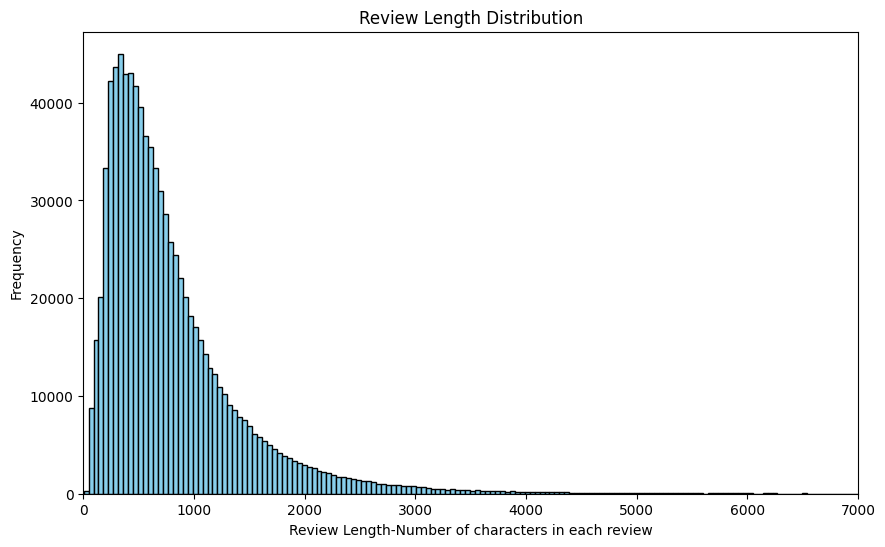

In [ ]:
# Assuming 'df' is your DataFrame and 'text' is the column containing review text
review_lengths = df['text'].apply(len)

# Create a histogram of review lengths
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=500, color='skyblue', edgecolor='black')
plt.title('Review Length Distribution')
plt.xlabel('Review Length-Number of characters in each review')
plt.ylabel('Frequency')
plt.xlim(0, 7000)
plt.show()


C:\Users\Isadora\AppData\Local\Temp\ipykernel_5172\2505391106.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  addresses_df['full_address'] = addresses_df.apply(lambda row: f"{row['street-address']}, {row['postal-code']}, {row['locality']}", axis=1)


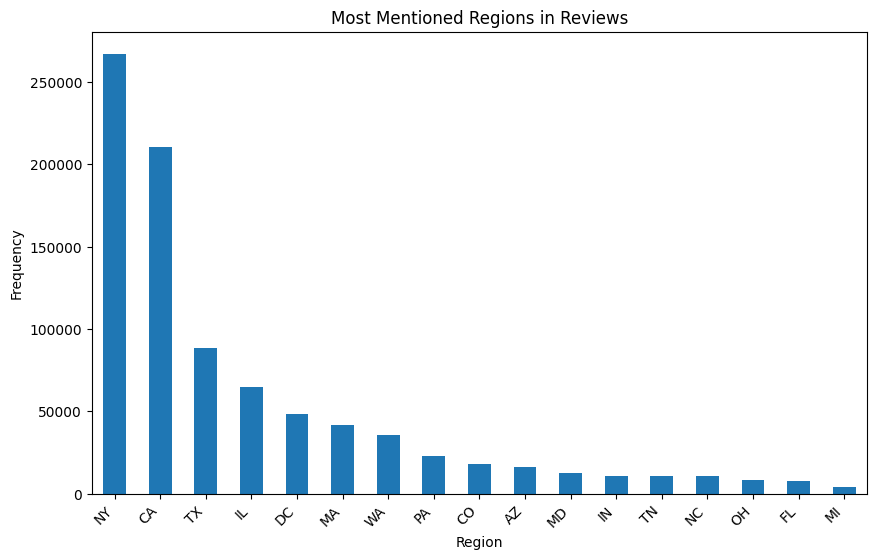

In [ ]:



# Assuming 'df' is your DataFrame with address information columns
addresses_df = df[['region', 'street-address', 'postal-code', 'locality']]

# Combine address components into a single 'full_address' column
addresses_df['full_address'] = addresses_df.apply(lambda row: f"{row['street-address']}, {row['postal-code']}, {row['locality']}", axis=1)

# Count occurrences of each region
most_common_regions = addresses_df['region'].value_counts()

# Visualize the most mentioned regions
most_common_regions.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Most Mentioned Regions in Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

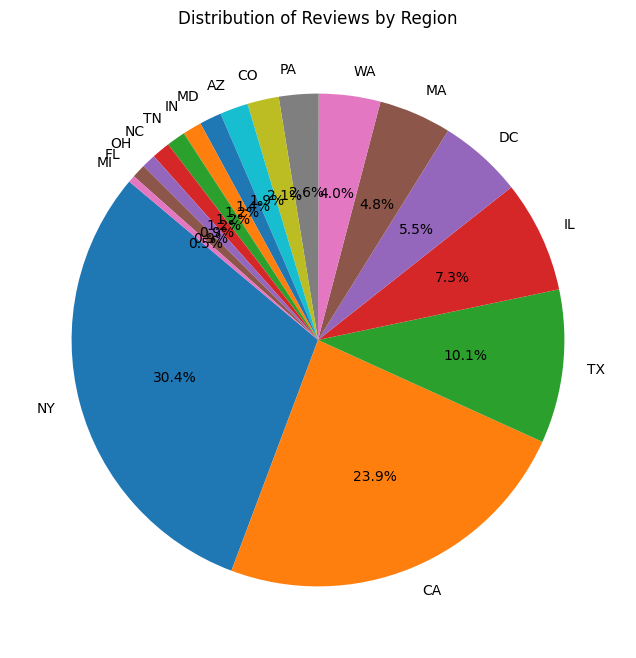

In [ ]:

# Assuming 'df' is your DataFrame with address information columns
# You can replace 'region' with the actual name of your region column
region_counts = df['region'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Reviews by Region')
plt.show()

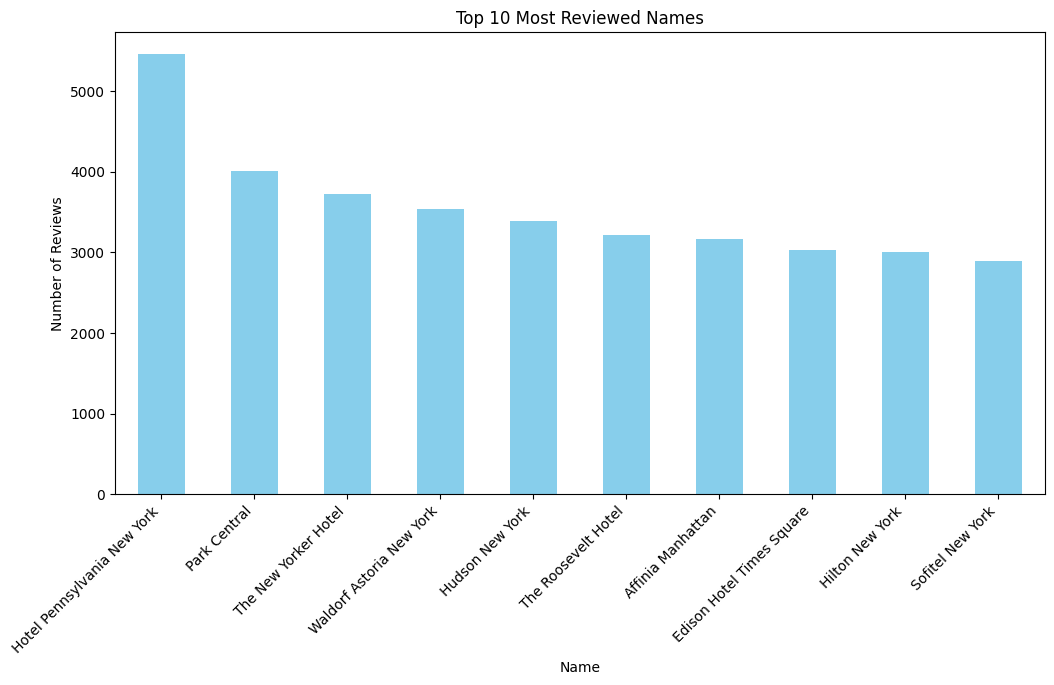

In [168]:

# Assuming 'df' is your DataFrame with a 'name' column
# You can replace 'name' with the actual name of your column
name_counts = df['name'].value_counts().head(10)  # Adjust the number as needed

# Plotting a bar chart
plt.figure(figsize=(12, 6))
name_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Reviewed Names')
plt.xlabel('Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:

# Assuming 'df' is your DataFrame and 'type' is the column with establishment types
type_counts = df['type'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Reviews by Establishment Type')

# Show the plot
plt.show()

KeyError: 'type'

In [ ]:
import re
## Lower Casing
df["text"] = df["text"].str.lower()

## Removal of Puctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text"] = df["text"].apply(lambda text: remove_punctuation(text))

## Removal of Stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text"] = df["text"].apply(lambda text: remove_stopwords(text))

## Removal of URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df["text"] = df["text"].apply(lambda text: remove_urls(text))

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Isadora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ratings,title,text,date,hotel_class,address,name,region,street-address,postal-code,locality,num_reviews
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",stayed king suite 11 nights yes cots us bit ha...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,NY,2130 Broadway at 75th Street,10023,New York City,29.0
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,every visit nyc hotel beacon place love stay c...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,NY,2130 Broadway at 75th Street,10023,New York City,2.0
2,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Excellent location”,loved hotel great location 2 blocks 72nd st su...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,NY,2130 Broadway at 75th Street,10023,New York City,7.0
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“All-round fantastic NYC hotel”,first stay upper west side cant say enough goo...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,NY,2130 Broadway at 75th Street,10023,New York City,8.0
4,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Great hotel in nice area”,great room big huge bed great location one blo...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,NY,2130 Broadway at 75th Street,10023,New York City,12.0


In [169]:
# deconstruct json columns
json_cols = ['ratings']

def clean_json(x):
    "Create apply function for decoding JSON"
    return json.loads(x)

for x in json_cols:
    df[x] = df[x].str.replace('\'','"')
    df[x] = df[x].apply(clean_json)

normalized_cols = pd.json_normalize(df['ratings'])
df = df.join(normalized_cols)
df = df.drop(json_cols, axis=1)
df = df.drop(['check_in_front_desk', 'business_service_(e_g_internet_access)'], axis=1)
df.head()


,title,text,date,hotel_class,address,name,service,cleanliness,overall,value,location,sleep_quality,rooms
0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,“Excellent location”,Loved the hotel. Great location - only 2 block...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,“All-round fantastic NYC hotel”,Our first stay on the upper west side and can'...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,4.0,5.0,5.0,5.0
4,“Great hotel in nice area”,"Great room, very big with huge bed! Great loca...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,4.0,5.0,5.0,5.0


In [170]:
df.head()

,title,text,date,hotel_class,address,name,service,cleanliness,overall,value,location,sleep_quality,rooms
0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,“Excellent location”,Loved the hotel. Great location - only 2 block...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,“All-round fantastic NYC hotel”,Our first stay on the upper west side and can'...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,4.0,5.0,5.0,5.0
4,“Great hotel in nice area”,"Great room, very big with huge bed! Great loca...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,4.0,5.0,5.0,5.0


In [171]:
# Iteratively impute missing values for ratings based on other correlated rating features- 
# Necessario porque valores nao existentes nao sao -1 como é habitual, apenas nao aparecem

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

impute_cols = ['overall', 'service', 'rooms', 'cleanliness', 'sleep_quality', 'location', 'value']

# Create an IterativeImputer and fit it to the selected columns
imputer = IterativeImputer(max_iter=10, random_state=0)
imputer.fit(df[impute_cols])

# Impute the missing values for the selected columns
df[impute_cols] = imputer.transform(df[impute_cols])

In [172]:
# Round up ratings to 1 decimal point
df[['overall', 'service', 'rooms', 'cleanliness', 'sleep_quality', 'location', 'value']] = df[['overall', 'service', 'rooms', 'cleanliness', 'sleep_quality', 'location', 'value']].round(1)
df.head()

,title,text,date,hotel_class,address,name,service,cleanliness,overall,value,location,sleep_quality,rooms
0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,“Excellent location”,Loved the hotel. Great location - only 2 block...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,“All-round fantastic NYC hotel”,Our first stay on the upper west side and can'...,2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,4.0,5.0,5.0,5.0
4,“Great hotel in nice area”,"Great room, very big with huge bed! Great loca...",2012-12-17,3.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,4.0,5.0,5.0,5.0


In [173]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
df['hotel_class'] = imputer.fit_transform(df[['overall', 'hotel_class']])

In [174]:
# Check if the dataset contains any NaN values
if df.isna().any().any():
    print("The dataset contains NaN values.")
else:
    print("The dataset does not contain any NaN values.")

The dataset does not contain any NaN values.


In [175]:
# Define a function to clean the text
def clean_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'(.)\1\1+', r"\1\1", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [w for w in tokens if len(w) > 2]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    
    text = ' '.join(tokens)
    return text

# Apply new function
df['text'] = df['text'].apply(clean_text)

In [178]:
df.head()

,title,text,date,hotel_class,address,name,service,cleanliness,overall,value,location,sleep_quality,rooms
0,"“Truly is ""Jewel of the Upper Wets Side""”",stayed king suite night yes cot bit happy stan...,2012-12-17,5.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,“My home away from home!”,every visit nyc hotel beacon place love stay c...,2012-12-17,5.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,“Excellent location”,loved hotel great location block subway bedroo...,2012-12-17,5.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,“All-round fantastic NYC hotel”,first stay upper west side cant say enough goo...,2012-12-17,5.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,4.0,5.0,5.0,5.0
4,“Great hotel in nice area”,great room big huge bed great location one blo...,2012-12-17,5.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,5.0,5.0,4.0,5.0,5.0,5.0


In [194]:
# Just to check
first_row_text = str(df.loc[3, 'text'])  # Convert to string
print(first_row_text)

for index, text_value in enumerate(df['text'].head(3)):
    # Check if the value is a list and convert it to a string
    if isinstance(text_value, list):
        text_value = ', '.join(map(str, text_value))

    print(f"Row {index + 1}: {text_value}")

Row 1: stayed king suite night yes cot bit happy standard room location friendliness staff room floor overlooking broadway madhouse fairway market room quite noise evident hallway adjoining room great able open window craved fresh rather heated air bed including fold sofa bed comfortable room cleaned well wifi access worked like dream one connectivity issue first night promptly responded call service provider ensure well location close street subway station great complimentary umbrella drizzly day greatly appreciated fabulous kitchen cooking facility access whole range fresh food directly across road fairway second time member party stayed beacon certainly hotel choice future visit
Row 2: every visit nyc hotel beacon place love stay conveniently located central park lincoln center great local restaurant room lovely bed comfortable great little kitchen new wizz bang coffee maker staff accommodating love walking across street fairway supermarket every imaginable goody eat choose every me

In [195]:
# Find the most common words
all_words = ' '.join(df['text']).lower().split()
word_counts = Counter(all_words)
top_words = word_counts.most_common(20)

print(top_words)

[('hotel', 1663434), ('room', 1582387), ('stay', 535248), ('great', 525328), ('staff', 491176), ('would', 426632), ('night', 421532), ('time', 387689), ('location', 374774), ('one', 373138), ('good', 372689), ('nice', 365591), ('stayed', 332342), ('clean', 320086), ('bed', 318173), ('service', 309852), ('breakfast', 279822), ('day', 273276), ('get', 267535), ('place', 245922)]


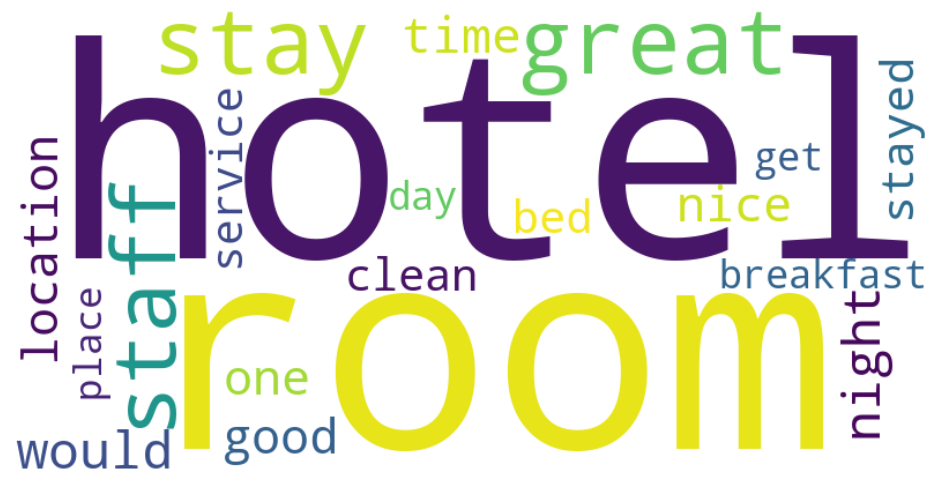

In [196]:

from wordcloud import WordCloud
# Create a word cloud
wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white').generate_from_frequencies(dict(top_words))

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

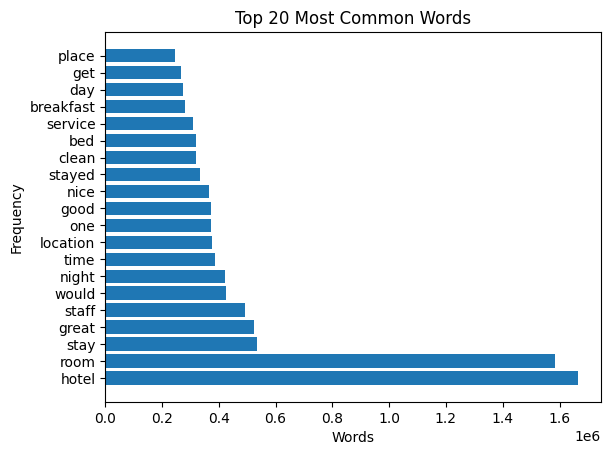

In [197]:
# Visualize most common words
fig, ax = plt.subplots()
ax.barh([word for (word, count) in top_words], [count for (word, count) in top_words])
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Top 20 Most Common Words')
plt.show()

Sentiment Analysis - Vader

In [198]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Isadora\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [199]:
# Define a function to classify the sentiment of a review
sia = SentimentIntensityAnalyzer()

def get_sentiment(review):
    scores = sia.polarity_scores(review)
    sentiment_score = scores['compound']
    if sentiment_score > 0.1:
        return 'positive'
    elif sentiment_score < -0.1:
        return 'negative'
    else:
        return 'neutral'
    
# Apply function on dataset copy
df2 = df.copy()
df2['Predicted_Sentiment'] = df2['text'].apply(get_sentiment)
df2.head()

# Print the number of positive, negative, and neutral reviews
print("Number of positive reviews:", len(df2[df2['Predicted_Sentiment'] == 'positive']))
print("Number of negative reviews:", len(df2[df2['Predicted_Sentiment'] == 'negative']))
print("Number of neutral reviews:", len(df2[df2['Predicted_Sentiment'] == 'neutral']))

Number of positive reviews: 734772
Number of negative reviews: 86727
Number of neutral reviews: 57062


In [201]:
df2.head()

,title,text,date,hotel_class,address,name,service,cleanliness,overall,value,location,sleep_quality,rooms,Predicted_Sentiment
0,"“Truly is ""Jewel of the Upper Wets Side""”",stayed king suite night yes cot bit happy stan...,2012-12-17,5.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,3.0,5.0,5.0,5.0,5.0,5.0,positive
1,“My home away from home!”,every visit nyc hotel beacon place love stay c...,2012-12-17,5.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,3.0,5.0,5.0,5.0,5.0,5.0,positive
2,“Excellent location”,loved hotel great location block subway bedroo...,2012-12-17,5.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,3.0,5.0,5.0,5.0,5.0,5.0,positive
3,“All-round fantastic NYC hotel”,first stay upper west side cant say enough goo...,2012-12-17,5.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,3.0,4.0,5.0,5.0,5.0,5.0,positive
4,“Great hotel in nice area”,great room big huge bed great location one blo...,2012-12-17,5.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,3.0,4.0,5.0,5.0,5.0,5.0,positive


In [214]:
unique_values = df2['overall'].unique()
print(unique_values)

[5.  4.  3.  3.1 4.8 2.  4.7 3.9 1.  2.2 1.5 3.8 1.7 2.3 4.4 4.1 1.3 4.2
 3.2 4.6 3.3 2.5 2.7 4.3 2.1 3.7 4.5 3.6 1.6 3.4 1.2 2.9 3.5 2.4 1.9 1.1
 2.8 1.4 2.6 1.8 0.8 0.7 0.6 0.9]


In [215]:
# Define the mapping function based on conditions
def map_sentiment(value):
    if np.isclose(value, 0.0) or 1.0 <= value < 2.0:
        return 'negative'
    elif 2.0 <= value < 3.0:
        return 'neutral'
    elif 3.0 <= value <= 5.0:
        return 'positive'
    else:
        return 'undefined'  # Add a default value or handle other cases as needed

# Apply the mapping function to create the 'True_Sentiment' column
df2['True_Sentiment'] = df2['overall'].apply(map_sentiment)

In [211]:
df2.head()

,title,text,date,hotel_class,address,name,service,cleanliness,overall,value,location,sleep_quality,rooms,Predicted_Sentiment,True_Sentiment
0,"“Truly is ""Jewel of the Upper Wets Side""”",stayed king suite night yes cot bit happy stan...,2012-12-17,5.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,3.0,5.0,5.0,5.0,5.0,5.0,positive,positive
1,“My home away from home!”,every visit nyc hotel beacon place love stay c...,2012-12-17,5.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,3.0,5.0,5.0,5.0,5.0,5.0,positive,positive
2,“Excellent location”,loved hotel great location block subway bedroo...,2012-12-17,5.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,3.0,5.0,5.0,5.0,5.0,5.0,positive,positive
3,“All-round fantastic NYC hotel”,first stay upper west side cant say enough goo...,2012-12-17,5.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,3.0,4.0,5.0,5.0,5.0,5.0,positive,positive
4,“Great hotel in nice area”,great room big huge bed great location one blo...,2012-12-17,5.0,"{'region': 'NY', 'street-address': '2130 Broad...",Hotel Beacon,5.0,3.0,4.0,5.0,5.0,5.0,5.0,positive,positive


In [216]:
# # Assuming 'your_column' is the column you want to check
# if df2['True_Sentiment'].nunique() == 1:
#     print("All values in the column are of the same type.")
# else:
#     print("Column has multiple types.")
# Assuming 'your_column' is the column you want to check
unique_values = df2['True_Sentiment'].unique()

# Check the data type of the first value
expected_type = type(unique_values[0])

# Filter and print values with a different type
different_type_values = [value for value in unique_values if type(value) != expected_type]

print(f"Values with a different type: {different_type_values}")

Values with a different type: []


In [217]:
# Calculate confusion matrix
cm = confusion_matrix(df2['True_Sentiment'], df2['Predicted_Sentiment'])

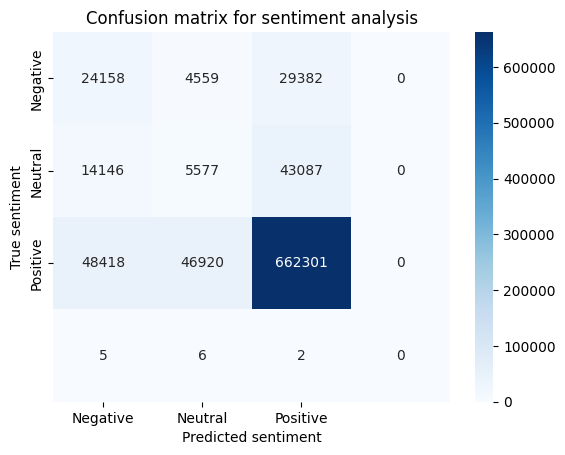

In [218]:
# Calculate confusion matrix
cm = confusion_matrix(df2['True_Sentiment'], df2['Predicted_Sentiment'])

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.title('Confusion matrix for sentiment analysis')
plt.show()

In [219]:
print("\nClassification report:\n", classification_report(df2['True_Sentiment'], 
                                                          df2['Predicted_Sentiment']))

c:\Users\Isadora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Isadora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification report:
               precision    recall  f1-score   support

    negative       0.28      0.42      0.33     58099
     neutral       0.10      0.09      0.09     62810
    positive       0.90      0.87      0.89    757639
   undefined       0.00      0.00      0.00        13

    accuracy                           0.79    878561
   macro avg       0.32      0.34      0.33    878561
weighted avg       0.80      0.79      0.79    878561



c:\Users\Isadora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
